<a href="https://colab.research.google.com/github/Arraj2611/ml_projects/blob/main/neural_network_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
# !nvidia-smi

In [27]:
# pip install setuptools

In [28]:
# !pip install tensorflow
# import tensorflow as tf
# tf.test.is_gpu_available()

In [29]:
tf.config.list_physical_devices('GPU')

[]

In [30]:
tf.__version__

'2.16.1'

# Insurance charges prediction using Neural Networks Regression
* Dataset used :- [Medical Cost Personal Datasets](https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv)
* Model used :- Sequential model with Dense layers
* Optimizers :- [SGD](https://keras.io/api/optimizers/sgd/) and [Adam](https://keras.io/api/optimizers/adam/)
* Metrics :- [MAE](https://keras.io/api/metrics/regression_metrics/#meanabsoluteerror-class)

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [32]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [33]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [35]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [36]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [37]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [38]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [39]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
pip install -U scikit-learn

In [42]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [47]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100, verbose=0)

In [48]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6999.7969 - mae: 6964.8130 


[6903.642578125, 6728.72509765625]

In [49]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

#Improving our model
1. Add an extra layer with more hidden units and use the Adam optimizer
2. Same as above but train for longer (200 epochs)
3. Experiment with the Learning Rate

In [50]:
#1. First try by step 1 i.e add Layers and change optimizer to ADAM
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13271.9971 - mae: 13274.1758   
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13095.6230 - mae: 13097.8838 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - loss: 12726.9580 - mae: 12729.3838
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11999.0498 - mae: 12001.7158 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10795.4277 - mae: 10798.0283 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9296.2910 - mae: 9298.4629 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - loss: 7984.7544 - mae: 7985.8066
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - loss: 7437.2559 - mae: 7437.5684
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - loss: 7363.1172 - mae: 7363.3496
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - loss: 7338.6553 - mae: 7338.9141
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - loss: 7316.2954 - mae: 7316.5723
Epoch 12/100
34/34 ━━━━

In [51]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4690.8555 - mae: 4665.0859 


[4672.70654296875, 4543.859375]

# we can see the loss and mae dropping
* early: (using SGD)
loss: 6999.7969 - mae: 6964.8130
* now :  (using ADAM)
loss: 4690.8555 - mae: 4665.0859

In [ ]:
# 2. Let's try training for longer i.e increase epochs to 200
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as above)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

In [53]:
# Evaluate our third model
insurance_model_3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3477.8037 - mae: 3464.3357 


[3464.875, 3397.53564453125]

Text(0.5, 0, 'epochs')

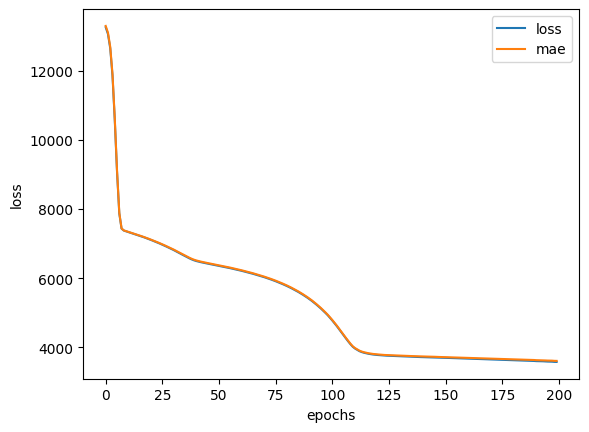

In [54]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

we can see the loss and mae dropping by tuning our training parameters
1. change optimizers from SGD -> ADAM and also adding layers
2. increase number of epochs

In [55]:
# let's try 3rd step i.e changing learning rate of our model using Adam


In [ ]:
tf.random.set_seed(42)

# 1. Create the model (same as above)
insurance_model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                          metrics=["mae"])

# 3. Fit the model
history = insurance_model_4.fit(X_train, y_train, epochs=200)

we can see that our Learning Rate is very less causing our model to not Learn quickly

In [ ]:
# change Lr
tf.random.set_seed(42)

# 1. Create the model (same as above)
insurance_model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_5.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                          metrics=["mae"])

# 3. Fit the model
history = insurance_model_5.fit(X_train, y_train, epochs=200)

Text(0.5, 0, 'epochs')

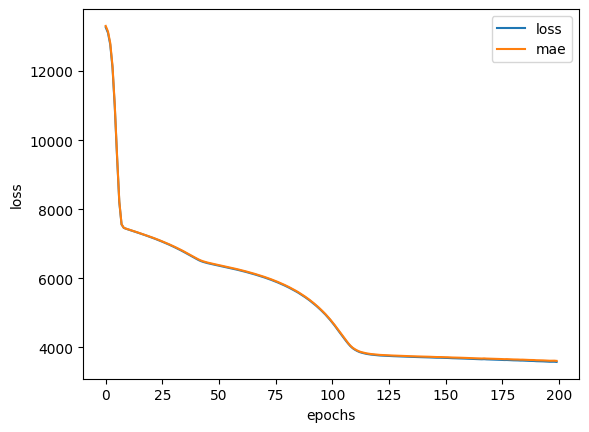

In [59]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [60]:
# Evaluate our third model
insurance_model_5.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3473.0278 - mae: 3459.4937 


[3463.442626953125, 3395.771728515625]

In [61]:
# Evaluate our third model
insurance_model_3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3477.8037 - mae: 3464.3357 


[3464.875, 3397.53564453125]

we can observe that change in learning rate has indeed improved our model

In [62]:
insurance_model_5.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 100)                 │           1,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,665 (26.04 KB)

 Trainable params: 2,221 (8.68 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,444 (17.36 KB)